In [68]:
import gymnasium as gym
import numpy as np

In [69]:
import minigrid

In [70]:
!pip3 install minigrid

Defaulting to user installation because normal site-packages is not writeable


In [71]:
import gymnasium as gym
import minigrid
from minigrid.minigrid_env import MiniGridEnv
from minigrid.wrappers import FullyObsWrapper

In [72]:
full_observable = FullyObsWrapper(env)

In [73]:
env = gym.make('MiniGrid-Empty-5x5-v0', render_mode="rgb_array")
s = env.reset()

In [96]:
s = env.reset()

In [106]:
env = gym.make('MiniGrid-DoorKey-5x5-v0', render_mode="rgb_array")


In [107]:
env.pprint_grid()

AttributeError: 'DoorKeyEnv' object has no attribute 'pprint_grid'

Defaulting to user installation because normal site-packages is not writeable
     |################################| 11.2 MB 11.6 MB/s eta 0:00:01
     |################################| 3.3 MB 31.8 MB/s eta 0:00:01
     |################################| 1.1 MB 30.8 MB/s eta 0:00:01
     |################################| 965 kB 33.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


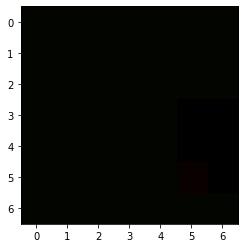

In [84]:
!pip install matplotlib


In [52]:
s[0]['image']

array([[[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [8, 1, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]]], dtype=uint8)

In [164]:
from minigrid.wrappers import ImgObsWrapper


def observation_to_grid_representation(env):
    """
    Converts a MiniGrid environment observation into a grid representation.
    
    Args:
        env: The MiniGrid environment object.    
    Returns:
        A 2D NumPy array representing the grid, where different objects are shown as characters.
    """
    grid = np.full((env.width, env.height), ' ')  # Create an empty grid filled with spaces

    # Iterate through each cell in the grid and map it to a corresponding symbol
    for x in range(env.width):
        for y in range(env.height):
            obj = env.grid.get(x, y)
            if obj is None:
                grid[x, y] = '.'
            else:
                grid[x, y] = obj_to_char(obj)
    
    # Add the agent's position to the grid representation
    agent_pos = env.agent_pos
    agent_dir = env.agent_dir  # Agent's direction: 0=right, 1=down, 2=left, 3=up
    grid[agent_pos[0], agent_pos[1]] = agent_dir_to_char(agent_dir)

    return grid.T

def obj_to_char(obj):
    """
    Maps MiniGrid objects to characters for the grid representation.
    
    Args:
        obj: The object from the MiniGrid environment.
    
    Returns:
        A single character representing the object in the grid.
    """
    if obj.type == 'wall':
        return '#'
    elif obj.type == 'goal':
        return 'G'
    elif obj.type == 'lava':
        return 'L'
    elif obj.type == 'door':
        return 'D'
    elif obj.type == 'key':
        return 'K'
    elif obj.type == 'ball':
        return 'B'
    elif obj.type == 'box':
        return 'X'
    elif obj.type == 'water':
        return 'W'
    else:
        return '?'  # Unknown objects

def agent_dir_to_char(agent_dir):
    """
    Maps the agent's direction to a character for the grid representation.
    
    Args:
        agent_dir: The direction the agent is facing (0=right, 1=down, 2=left, 3=up).
    
    Returns:
        A single character representing the agent's facing direction.
    """
#     AGENT_DIR_TO_STR = {0: ">", 1: "V", 2: "<", 3: "^"}
    AGENT_DIR_TO_STR = {0: ">", 1: "V", 2: "<", 3: "^"}
    if agent_dir in AGENT_DIR_TO_STR:
        return AGENT_DIR_TO_STR[agent_dir]
    else:
        return 'A'  # Default character for the agent if direction is unknown


In [165]:
env = gym.make('MiniGrid-Empty-5x5-v0', render_mode="rgb_array")
s = env.reset()
observation_to_grid_representation(env)

array([['#', '#', '#', '#', '#'],
       ['#', '>', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [166]:
print(env.agent_dir, env.agent_pos)

0 (1, 1)


In [167]:
observation_to_grid_representation(env)

array([['#', '#', '#', '#', '#'],
       ['#', '>', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [168]:
s = env.step(2)


In [169]:
observation_to_grid_representation(env)

array([['#', '#', '#', '#', '#'],
       ['#', '.', '>', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [170]:
print(env.agent_dir, env.agent_pos)

0 (2, 1)


In [171]:
env.step(0)
print(s[0]["direction"])
observation_to_grid_representation(env)

0


array([['#', '#', '#', '#', '#'],
       ['#', '.', '^', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [172]:
env.step(0)
observation_to_grid_representation(env)

array([['#', '#', '#', '#', '#'],
       ['#', '.', '<', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [173]:
env.step(2)
observation_to_grid_representation(env)

array([['#', '#', '#', '#', '#'],
       ['#', '<', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [174]:
env.step(1)
observation_to_grid_representation(env)

array([['#', '#', '#', '#', '#'],
       ['#', '^', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [175]:
s = env.step(2)
print(s[0]['direction'])
observation_to_grid_representation(env)

3


array([['#', '#', '#', '#', '#'],
       ['#', '^', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [176]:
s = env.step(1)
print(s[0]['direction'])
observation_to_grid_representation(env)

0


array([['#', '#', '#', '#', '#'],
       ['#', '>', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [177]:
s = env.step(2)
print(s[0]['direction'])
observation_to_grid_representation(env)

0


array([['#', '#', '#', '#', '#'],
       ['#', '.', '>', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [178]:
s = env.step(2)
print(s[0]['direction'])
observation_to_grid_representation(env)

0


array([['#', '#', '#', '#', '#'],
       ['#', '.', '.', '>', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [179]:
s = env.step(1)
print(s[0]['direction'])
observation_to_grid_representation(env)

1


array([['#', '#', '#', '#', '#'],
       ['#', '.', '.', 'V', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [180]:
s = env.step(2)
print(s[0]['direction'])
observation_to_grid_representation(env)

1


array([['#', '#', '#', '#', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'V', '#'],
       ['#', '.', '.', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [181]:
s = env.step(2)
print(s[0]['direction'])
observation_to_grid_representation(env)

1


array([['#', '#', '#', '#', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', 'V', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [182]:
s

({'image': array([[[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
 

In [184]:
env = gym.make('MiniGrid-DoorKey-5x5-v0', render_mode="rgb_array")
s = env.reset()
observation_to_grid_representation(env)

array([['#', '#', '#', '#', '#'],
       ['#', '^', '#', '.', '#'],
       ['#', '.', 'D', '.', '#'],
       ['#', 'K', '#', 'G', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')